In [1]:
# Install the required package from Pypi
# pip install pca

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
life_exep_data = pd.read_csv('data/impv/final.csv')

In [4]:
life_exep_data.head()

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,Afghanistan,2000,Female,57.120,13.846,85.000,13684491660.790,18240442244.769,6.400,434.740,...,24.000,65.077,27.000,0.300,21.871,85.000,22.078,77.922,39.400,4.800
1,Afghanistan,2001,Female,57.596,13.849,82.700,13684491660.790,18240442244.769,7.200,434.740,...,33.000,65.077,37.000,0.390,21.881,84.000,22.169,77.831,40.100,4.800
2,Afghanistan,2002,Female,58.080,14.355,80.400,4055179566.350,18240442244.769,8.200,179.427,...,36.000,65.077,35.000,0.390,23.274,87.000,22.261,77.739,40.500,4.600
3,Afghanistan,2003,Female,58.578,14.222,77.800,4515558808.110,18240442244.769,9.400,190.684,...,41.000,65.077,39.000,0.390,24.667,86.000,22.353,77.647,40.100,4.600
4,Afghanistan,2004,Female,59.093,14.047,75.300,5226778808.892,18240442244.769,10.400,211.382,...,50.000,65.077,48.000,0.390,26.068,89.000,22.500,77.500,40.200,4.600


In [5]:
life_exep_data.describe()

,Year,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
count,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000
mean,2009.495,69.834,8.256,30.235,2032870320199.638,2042053577025.779,60.593,12668.853,18.229,136.043,85.685,81.308,84.855,2.986,71.106,76.726,55.559,44.441,22.100,10.619
std,5.762,9.302,6.155,25.461,7249369673698.859,7254721460142.498,36.964,19447.598,8.223,176.090,14.208,18.469,14.218,2.284,29.583,14.757,22.436,22.436,8.504,11.070
min,2000.000,38.861,0.052,1.400,63101272.370,72802185.001,0.000,111.927,0.000,0.000,19.000,0.050,16.000,0.010,2.755,0.000,8.246,0.000,4.400,0.000
25%,2005.000,63.894,4.331,9.300,7267552276.129,7584112233.046,23.000,1366.059,12.700,21.000,81.000,75.083,79.000,1.308,46.007,73.000,36.519,26.118,16.300,4.000
50%,2009.000,71.445,6.561,23.300,45247974037.038,45940355554.258,61.950,4348.605,18.229,82.000,90.104,86.700,89.320,2.632,84.227,78.000,55.367,44.633,21.925,7.800
75%,2014.000,76.845,10.133,44.865,501278724553.924,523061711019.377,99.334,14443.944,24.100,159.000,96.000,95.000,95.092,3.600,97.177,86.000,73.882,63.481,26.200,12.300
max,2019.000,88.100,43.166,146.200,87568054407493.094,87532722519257.594,100.000,180366.715,64.600,1590.000,99.000,99.000,99.000,14.690,100.000,100.000,100.000,91.754,64.100,147.800


In [6]:
# life_exep_data['Gender'] = life_exep_data['Gender'].map({'Male': 0,'Female': 1})

In [7]:
life_exep_data.skew(axis = 0, numeric_only = True)

Year                                      -0.001
Life expectancy                           -0.617
Unemployment                               1.768
Infant Mortality                           1.089
GDP                                        5.889
GNI                                        5.910
Clean fuels and cooking technologies      -0.383
Per Capita                                 2.994
Mortality caused by road traffic injury    0.213
Tuberculosis Incidence                     3.097
DPT Immunization                          -1.661
HepB3 Immunization                        -1.792
Measles Immunization                      -1.434
Hospital beds                              1.668
Basic sanitation services                 -0.759
Tuberculosis treatment                    -2.230
Urban population                           0.067
Rural population                          -0.067
Non-communicable Mortality                 0.880
Sucide Rate                                3.686
dtype: float64

Lets visualise the distribution of Life Expectancy at birth.

In [8]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);

In [9]:
def get_outlier(df, column):
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    return df[(df[column]>=(Q3+1.5*IQR)) | (df[column]<=(Q1-1.5*IQR))].sort_values(by=[column]).reset_index()

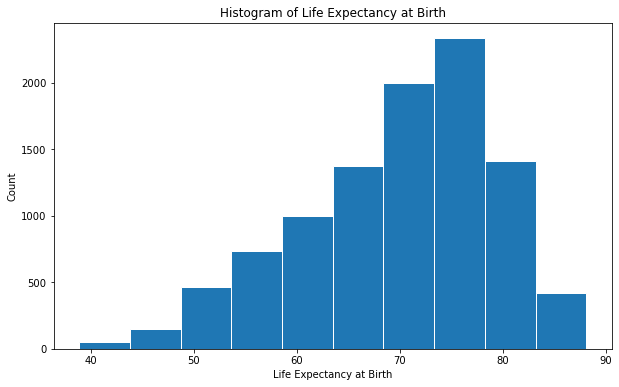

In [10]:
plot_histogram(life_exep_data['Life expectancy'], 'Count', 'Life Expectancy at Birth', "Histogram of Life Expectancy at Birth")

In [11]:
life_exep_data['Life expectancy'].skew()

-0.617472379194249

<AxesSubplot:xlabel='Life expectancy'>

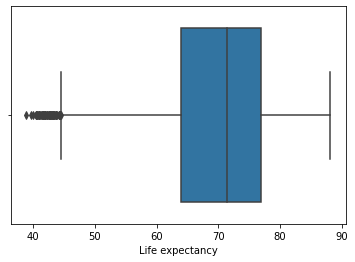

In [12]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Life expectancy'])

From the above histogram we can conclude that most of data lies between 70 and 80.

Next we are going to do visualise the distribution of Unemployment column.

In [13]:
df = get_outlier(life_exep_data, 'Life expectancy')

df[['Country','Year','Gender','Life expectancy']]

,Country,Year,Gender,Life expectancy
0,Sierra Leone,2000,Male,38.861
1,Sierra Leone,2001,Male,39.745
2,Sierra Leone,2000,Female,40.005
3,Lesotho,2006,Male,40.418
4,Lesotho,2007,Male,40.555
5,Lesotho,2005,Male,40.566
6,Eswatini,2005,Male,40.663
7,Sierra Leone,2002,Male,40.708
8,Eswatini,2004,Male,40.749
9,Eswatini,2006,Male,40.923


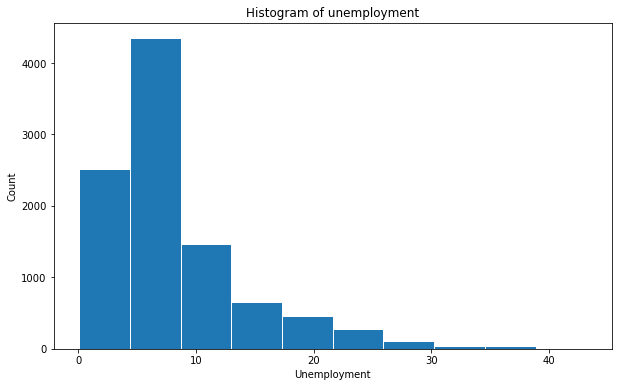

In [14]:
plot_histogram(life_exep_data['Unemployment'], 'Count', 'Unemployment', "Histogram of unemployment")

From the above histogram we can conclude most of the data are between 5 to 10.

<AxesSubplot:xlabel='Unemployment'>

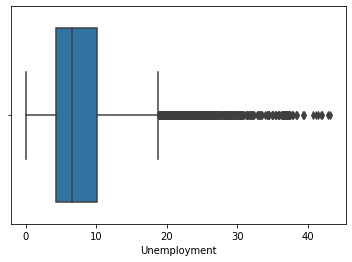

In [15]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Unemployment'])

In [16]:
df = get_outlier(life_exep_data, 'Unemployment')

df[['Country','Year','Gender','Unemployment']]

,Country,Year,Gender,Unemployment
0,Bulgaria,2001,Female,18.855
1,Bosnia and Herzegovina,2017,Male,18.857
2,Poland,2003,Male,18.898
3,St. Lucia,2015,Male,18.905
4,"Congo, Rep.",2012,Male,18.911
...,...,...,...,...
753,South Africa,2002,Female,41.372
754,West Bank and Gaza,2018,Female,41.873
755,Lesotho,2001,Female,41.936
756,West Bank and Gaza,2017,Female,42.811


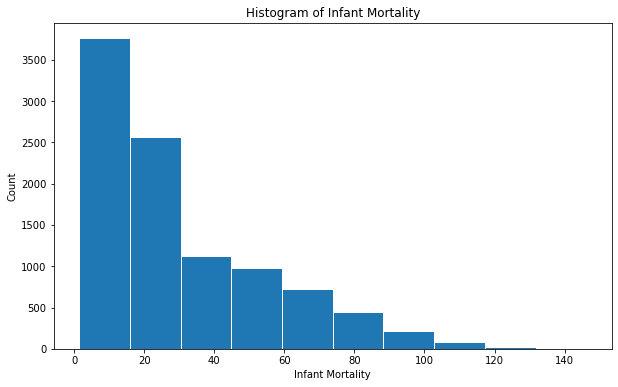

In [17]:
plot_histogram(life_exep_data['Infant Mortality'], 'Count', 'Infant Mortality', "Histogram of Infant Mortality")

<AxesSubplot:xlabel='Infant Mortality'>

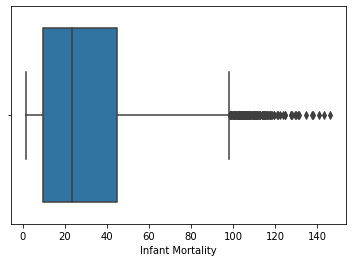

In [18]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Infant Mortality'])

In [19]:
df = get_outlier(life_exep_data, 'Infant Mortality')

df[['Country','Year','Gender','Infant Mortality']]

,Country,Year,Gender,Infant Mortality
0,Liberia,2005,Male,98.500
1,Chad,2006,Male,98.500
2,Equatorial Guinea,2000,Female,98.500
3,Sub-Saharan Africa (IDA & IBRD countries),2000,Male,98.551
4,Sub-Saharan Africa (excluding high income),2000,Male,98.556
...,...,...,...,...
148,Sierra Leone,2003,Male,137.700
149,Liberia,2000,Male,137.800
150,Sierra Leone,2002,Male,140.700
151,Sierra Leone,2001,Male,143.400


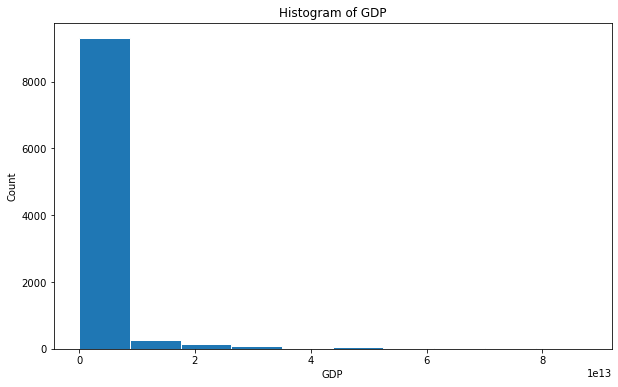

In [20]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

From the above histogram we can conclude that the data has left skewed.

<AxesSubplot:xlabel='GDP'>

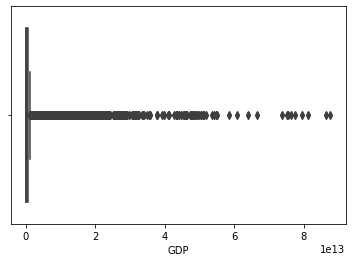

In [21]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])

In [22]:
life_exep_data['GDP'].skew()

5.889286292623093

In [23]:
df = get_outlier(life_exep_data, 'GDP')

df[['Country','Year','Gender','GDP']]

,Country,Year,Gender,GDP
0,"Korea, Rep.",2011,Female,1253223044718.990
1,"Korea, Rep.",2011,Male,1253223044718.990
2,Europe & Central Asia (IDA & IBRD countries),2003,Female,1257924182661.530
3,Europe & Central Asia (IDA & IBRD countries),2003,Male,1257924182661.530
4,Pre-demographic dividend,2017,Female,1258665620177.510
...,...,...,...,...
1775,World,2017,Female,81193291658568.797
1776,World,2018,Male,86267600625419.406
1777,World,2018,Female,86267600625419.406
1778,World,2019,Female,87568054407493.094


In [24]:
outlier_countries = df['Country'].unique()
remove_list = ["Korea, Rep.", "Spain", "Mexico", "Italy", "Russian Federation", "Canada", "Australia", "China", "India", "France", "Brazil", "United Kingdom", "Germany", "St. Martin (French part)", "Korea, Dem. People's Rep.", "Japan", "United States"]
remove_list = np.setdiff1d(outlier_countries,remove_list)

In [25]:
life_exep_data[life_exep_data.Country.isin(remove_list)]

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
140,Arab World,2000,Female,69.700,17.881,40.375,816038849805.683,796768261498.565,75.328,2890.228,...,82.937,55.255,81.453,1.599,73.305,76.726,52.989,47.011,22.326,3.240
141,Arab World,2001,Female,69.960,17.757,39.166,798525022054.761,784098282162.029,76.636,2768.502,...,84.083,59.460,81.010,1.643,73.568,76.726,53.251,46.749,22.457,3.189
142,Arab World,2002,Female,70.219,18.241,37.948,803142348125.716,792448918283.542,77.881,2725.610,...,82.017,59.965,81.158,1.576,74.163,76.726,53.516,46.484,22.451,3.137
143,Arab World,2003,Female,70.484,18.103,36.858,887874177404.300,873535008967.277,79.027,2948.633,...,82.386,60.288,81.400,1.571,74.547,76.726,53.801,46.199,22.314,3.066
144,Arab World,2004,Female,70.758,17.906,35.733,1056272163163.200,1044492857776.080,80.002,3430.983,...,83.301,66.780,82.045,1.606,74.959,76.726,54.106,45.894,22.108,3.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,World,2015,Male,69.784,5.493,33.500,75112444159420.094,75232602112653.594,61.621,10222.608,...,84.785,82.717,84.949,2.706,72.764,83.000,53.916,46.084,22.725,13.028
9864,World,2016,Male,70.014,5.522,32.600,76305058874647.797,76282280462949.000,62.746,10264.929,...,85.842,84.018,85.204,2.759,73.904,81.000,54.374,45.626,22.607,12.860
9865,World,2017,Male,70.227,5.423,31.700,81193291658568.797,81295071732629.797,63.802,10798.153,...,85.795,83.650,85.257,2.894,74.930,85.000,54.828,45.172,22.197,12.775
9866,World,2018,Male,70.409,5.283,30.900,86267600625419.406,86243803476022.203,65.063,11347.336,...,85.617,83.468,85.648,2.736,76.034,85.000,55.277,44.723,21.947,12.756


In [26]:
life_exep_data = life_exep_data[~life_exep_data.Country.isin(remove_list)]

<AxesSubplot:xlabel='GDP'>

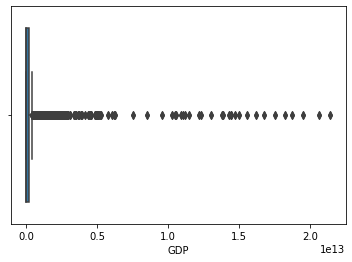

In [27]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])

In [28]:
df = get_outlier(life_exep_data, 'GDP')

df[['Country','Year','Gender','GDP']]

,Country,Year,Gender,GDP
0,South Africa,2011,Male,458201514136.977
1,South Africa,2011,Female,458201514136.977
2,"Iran, Islamic Rep.",2013,Male,460293149324.326
3,"Iran, Islamic Rep.",2013,Female,460293149324.326
4,Africa Western and Central,2007,Female,461777599573.788
...,...,...,...,...
1103,United States,2017,Male,19542979183000.000
1104,United States,2018,Female,20611860934000.000
1105,United States,2018,Male,20611860934000.000
1106,United States,2019,Female,21433224697000.000


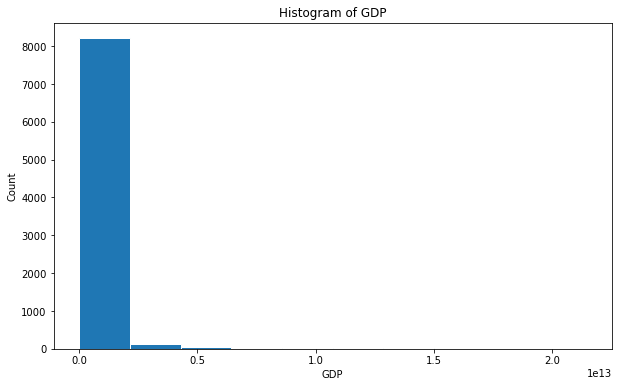

In [29]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

In [30]:
life_exep_data['GDP'] = np.log(life_exep_data['GDP'])

<AxesSubplot:xlabel='GDP'>

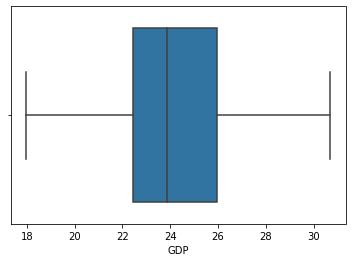

In [31]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])

In [32]:
life_exep_data[(life_exep_data['Year']==2019)]['GDP'].mean()

24.599324597087428

In [33]:
sub = life_exep_data[life_exep_data['Country'] == 'United States']
sub[['Country','Year','Gender','GDP', 'GNI']]

,Country,Year,Gender,GDP,GNI
4704,United States,2000,Female,29.959,10383667000000.000
4705,United States,2001,Female,29.990,10746067000000.000
4706,United States,2002,Female,30.023,11052223000000.000
4707,United States,2003,Female,30.070,11534846000000.000
4708,United States,2004,Female,30.134,12317643000000.000
4709,United States,2005,Female,30.199,13166516000000.000
4710,United States,2006,Female,30.257,14066382000000.000
4711,United States,2007,Female,30.302,14550103000000.000
4712,United States,2008,Female,30.320,14718111000000.000
4713,United States,2009,Female,30.302,14426269000000.000


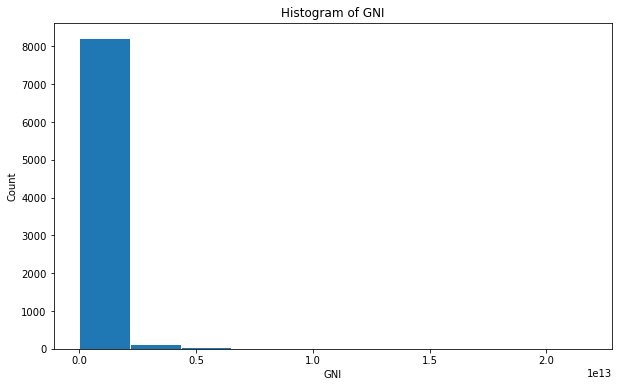

In [34]:
plot_histogram(life_exep_data['GNI'], 'Count', 'GNI', "Histogram of GNI")

From the above histogram we can conclude that the data has left skewed.

<AxesSubplot:xlabel='GNI'>

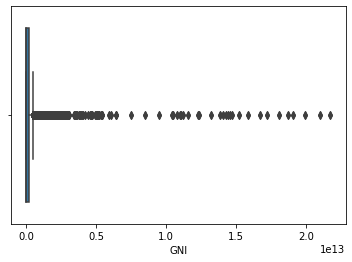

In [35]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GNI'])

In [36]:
df = get_outlier(life_exep_data, 'GNI')

df[['Country','Year','Gender','GNI']]

,Country,Year,Gender,GNI
0,Switzerland,2006,Male,475184149784.655
1,Switzerland,2006,Female,475184149784.655
2,Least developed countries: UN classification,2007,Female,475315446516.675
3,Least developed countries: UN classification,2007,Male,475315446516.675
4,Belgium,2007,Male,476866548042.705
...,...,...,...,...
1149,United States,2017,Male,19893073000000.000
1150,United States,2018,Female,20946778000000.000
1151,United States,2018,Male,20946778000000.000
1152,United States,2019,Male,21708650000000.000


In [37]:
life_exep_data['GNI'] = np.log(life_exep_data['GNI'])

<AxesSubplot:xlabel='GNI'>

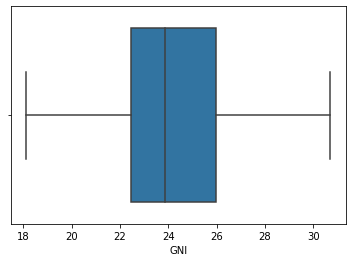

In [38]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GNI'])

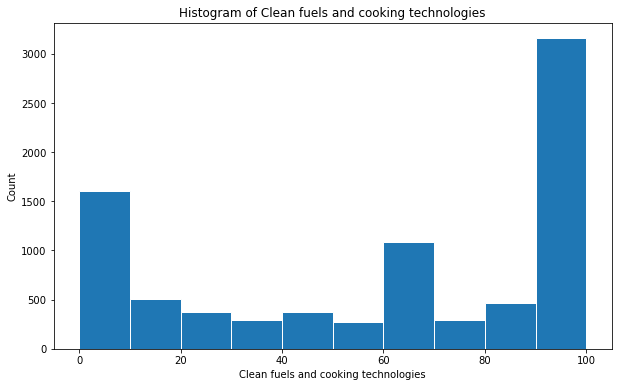

In [39]:
plot_histogram(life_exep_data['Clean fuels and cooking technologies'], 'Count', 'Clean fuels and cooking technologies', "Histogram of Clean fuels and cooking technologies")

From the above histogram we can find that most of the data lies between 90 and 100.

<AxesSubplot:xlabel='Clean fuels and cooking technologies'>

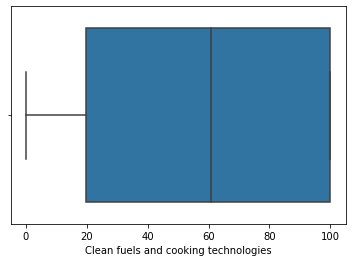

In [40]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Clean fuels and cooking technologies'])

In [41]:
df = get_outlier(life_exep_data, 'Clean fuels and cooking technologies')
df[['Country','Year','Gender','Clean fuels and cooking technologies']]

,Country,Year,Gender,Clean fuels and cooking technologies


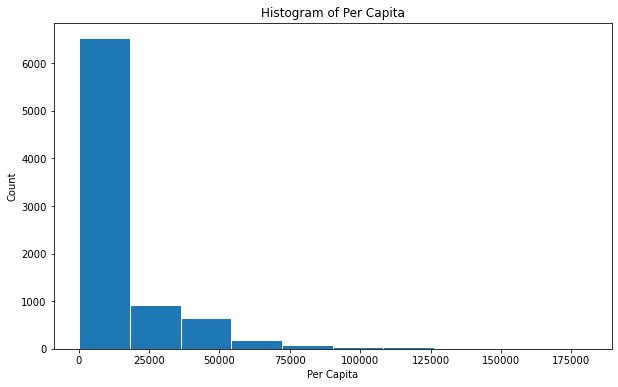

In [42]:
plot_histogram(life_exep_data['Per Capita'], 'Count', 'Per Capita', "Histogram of Per Capita")

Per Capita income has distribution of left skewed.

<AxesSubplot:xlabel='Per Capita'>

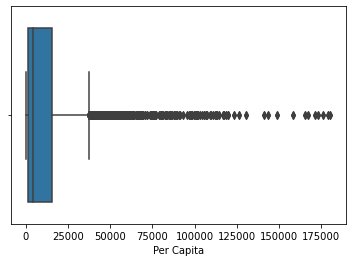

In [43]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Per Capita'])

In [44]:
df = get_outlier(life_exep_data, 'Per Capita')
df[['Country','Year','Gender','Per Capita']]

,Country,Year,Gender,Per Capita
0,New Caledonia,2008,Male,37353.737
1,New Caledonia,2008,Female,37353.737
2,New Caledonia,2010,Male,37494.895
3,New Caledonia,2010,Female,37494.895
4,Kuwait,2009,Male,37561.726
...,...,...,...,...
955,Liechtenstein,2019,Female,175813.876
956,Liechtenstein,2014,Male,178864.852
957,Liechtenstein,2014,Female,178864.852
958,Liechtenstein,2018,Female,180366.715


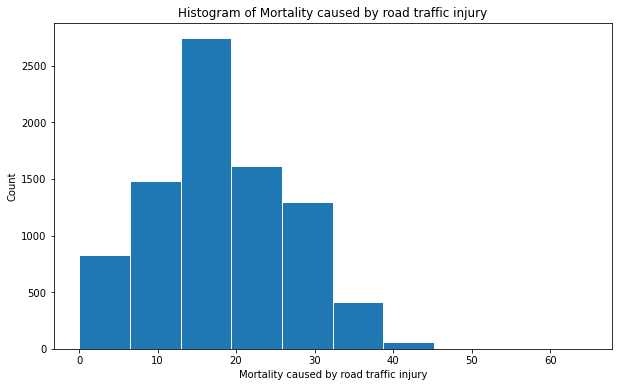

In [45]:
plot_histogram(life_exep_data['Mortality caused by road traffic injury'], 'Count', 'Mortality caused by road traffic injury', "Histogram of Mortality caused by road traffic injury")

The above histogram shows that the data are normaly distributed.

<AxesSubplot:xlabel='Mortality caused by road traffic injury'>

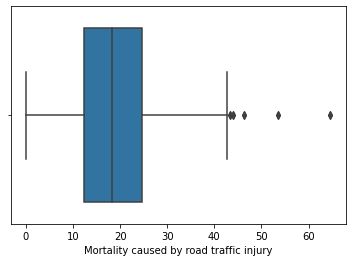

In [46]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Mortality caused by road traffic injury'])

In [47]:
df = get_outlier(life_exep_data, 'Mortality caused by road traffic injury')
df[['Country','Year','Gender','Mortality caused by road traffic injury']]

,Country,Year,Gender,Mortality caused by road traffic injury
0,South Africa,2003,Female,43.400
1,South Africa,2003,Male,43.400
2,South Africa,2000,Female,44.000
3,South Africa,2000,Male,44.000
4,Dominican Republic,2017,Female,46.300
5,Dominican Republic,2017,Male,46.300
6,Dominican Republic,2018,Female,53.500
7,Dominican Republic,2018,Male,53.500
8,Dominican Republic,2019,Female,64.600
9,Dominican Republic,2019,Male,64.600


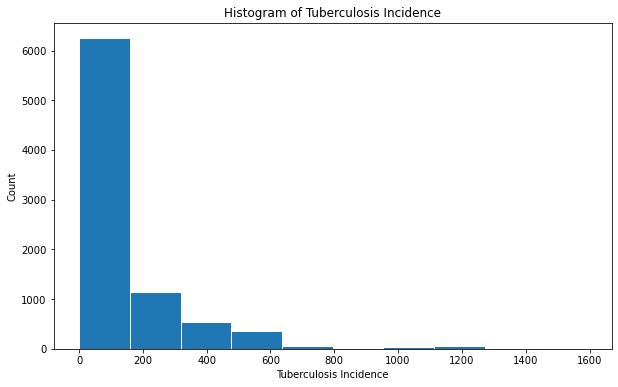

In [48]:
plot_histogram(life_exep_data['Tuberculosis Incidence'], 'Count', 'Tuberculosis Incidence', "Histogram of Tuberculosis Incidence")

Tuberculosis Incidence has distribution of left skewed.

<AxesSubplot:xlabel='Tuberculosis Incidence'>

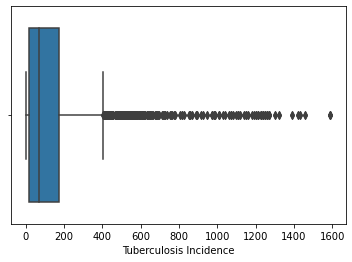

In [49]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Tuberculosis Incidence'])

In [50]:
df = get_outlier(life_exep_data, 'Tuberculosis Incidence')
df[['Country','Year','Gender','Tuberculosis Incidence']]

,Country,Year,Gender,Tuberculosis Incidence
0,Nepal,2001,Male,405.000
1,Nepal,2001,Female,405.000
2,Zambia,2014,Male,406.000
3,Zambia,2014,Female,406.000
4,Kiribati,2012,Male,407.000
...,...,...,...,...
693,Eswatini,2006,Female,1460.000
694,Eswatini,2010,Male,1590.000
695,Eswatini,2010,Female,1590.000
696,Eswatini,2009,Female,1590.000


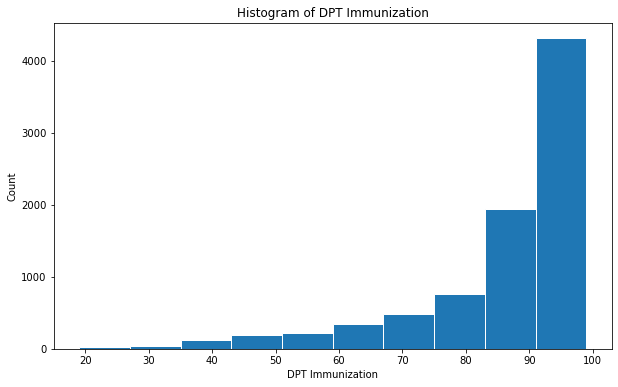

In [51]:
plot_histogram(life_exep_data['DPT Immunization'], 'Count', 'DPT Immunization', "Histogram of DPT Immunization")

The data of DPT Immunization is skewed towards right.

<AxesSubplot:xlabel='DPT Immunization'>

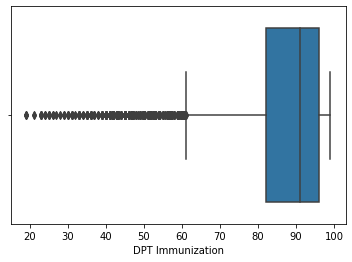

In [52]:
sns.boxplot(data=life_exep_data, x=life_exep_data['DPT Immunization'])

In [53]:
df = get_outlier(life_exep_data, 'DPT Immunization')
df[['Country','Year','Gender','DPT Immunization']]

,Country,Year,Gender,DPT Immunization
0,Ukraine,2016,Female,19.000
1,Chad,2008,Female,19.000
2,Ukraine,2016,Male,19.000
3,Chad,2008,Male,19.000
4,Chad,2004,Female,21.000
...,...,...,...,...
695,Lao PDR,2008,Male,61.000
696,Mali,2002,Male,61.000
697,Pakistan,2001,Male,61.000
698,South Sudan,2011,Female,61.000


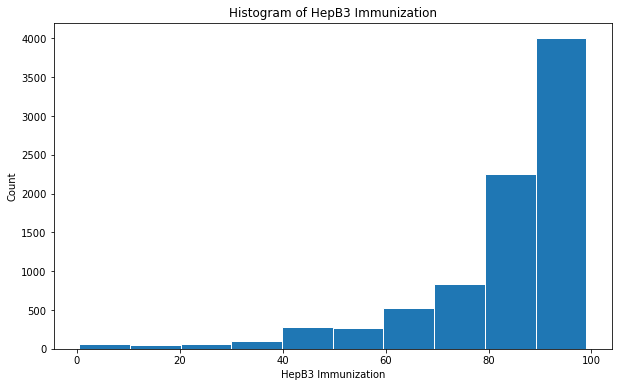

In [54]:
plot_histogram(life_exep_data['HepB3 Immunization'], 'Count', 'HepB3 Immunization', "Histogram of HepB3 Immunization")

The data of HepB3 Immunization is skewed towards right.

<AxesSubplot:xlabel='HepB3 Immunization'>

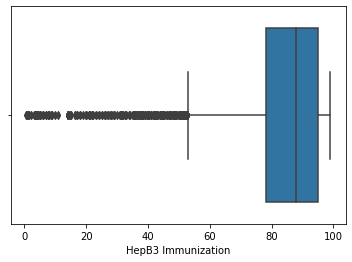

In [55]:
sns.boxplot(data=life_exep_data, x=life_exep_data['HepB3 Immunization'])

In [56]:
df = get_outlier(life_exep_data, 'HepB3 Immunization')
df[['Country','Year','Gender','HepB3 Immunization']]

,Country,Year,Gender,HepB3 Immunization
0,Africa Western and Central,2000,Male,0.467
1,Africa Western and Central,2000,Female,0.467
2,Least developed countries: UN classification,2000,Female,0.745
3,Least developed countries: UN classification,2000,Male,0.745
4,Africa Western and Central,2001,Male,1.057
...,...,...,...,...
669,India,2002,Female,52.562
670,India,2003,Female,52.562
671,India,2003,Male,52.562
672,India,2001,Male,52.562


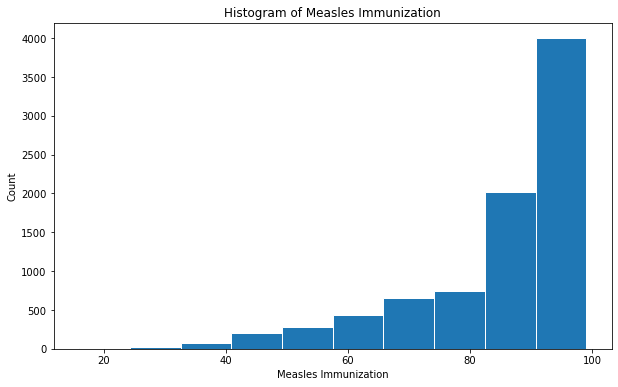

In [57]:
plot_histogram(life_exep_data['Measles Immunization'], 'Count', 'Measles Immunization', "Histogram of Measles Immunization")

The data of Measles Immunization is skewed towards right.

<AxesSubplot:xlabel='Measles Immunization'>

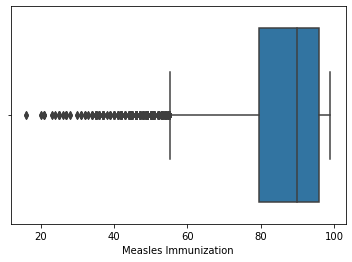

In [58]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Measles Immunization'])

In [59]:
df = get_outlier(life_exep_data, 'Measles Immunization')
df[['Country','Year','Gender','Measles Immunization']]

,Country,Year,Gender,Measles Immunization
0,Chad,2004,Male,16.000
1,Chad,2004,Female,16.000
2,Somalia,2001,Male,20.000
3,Somalia,2001,Female,20.000
4,Angola,2006,Male,21.000
...,...,...,...,...
451,South Sudan,2005,Female,54.111
452,Heavily indebted poor countries (HIPC),2000,Female,54.326
453,Heavily indebted poor countries (HIPC),2000,Male,54.326
454,Heavily indebted poor countries (HIPC),2001,Female,54.738


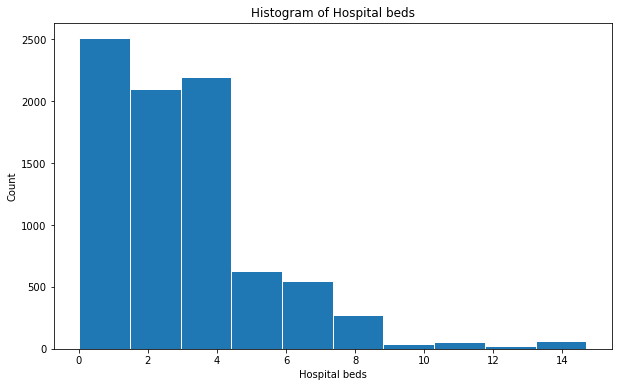

In [60]:
plot_histogram(life_exep_data['Hospital beds'], 'Count', 'Hospital beds', "Histogram of Hospital beds")

The data of Hospital beds is skewed towards left.

<AxesSubplot:xlabel='Hospital beds'>

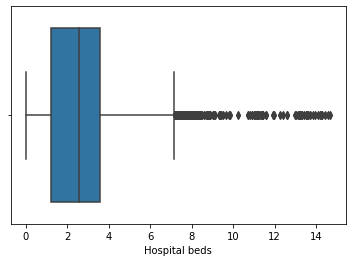

In [61]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Hospital beds'])

In [62]:
df = get_outlier(life_exep_data, 'Hospital beds')
df[['Country','Year','Gender','Hospital beds']]

,Country,Year,Gender,Hospital beds
0,Hungary,2010,Female,7.180
1,Lithuania,2009,Female,7.180
2,Lithuania,2008,Female,7.180
3,Hungary,2010,Male,7.180
4,Lithuania,2008,Male,7.180
...,...,...,...,...
511,Japan,2002,Female,14.430
512,Japan,2001,Male,14.580
513,Japan,2001,Female,14.580
514,Japan,2000,Female,14.690


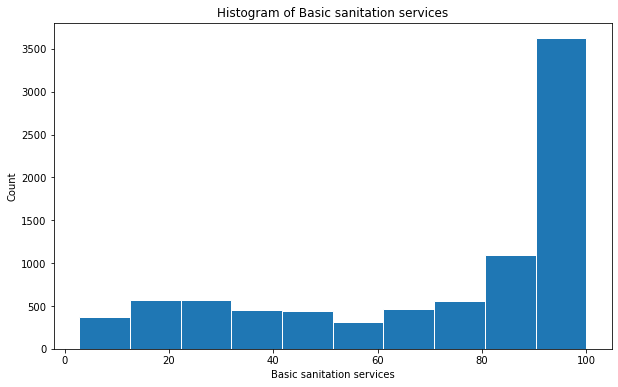

In [63]:
plot_histogram(life_exep_data['Basic sanitation services'], 'Count', 'Basic sanitation services', "Histogram of Basic sanitation services")

From the above histogram we can find that the most of the data lies between 90 to 100.

<AxesSubplot:xlabel='Basic sanitation services'>

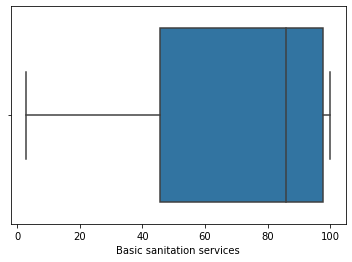

In [64]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Basic sanitation services'])

In [65]:
df = get_outlier(life_exep_data, 'Basic sanitation services')
df[['Country','Year','Gender','Basic sanitation services']]

,Country,Year,Gender,Basic sanitation services


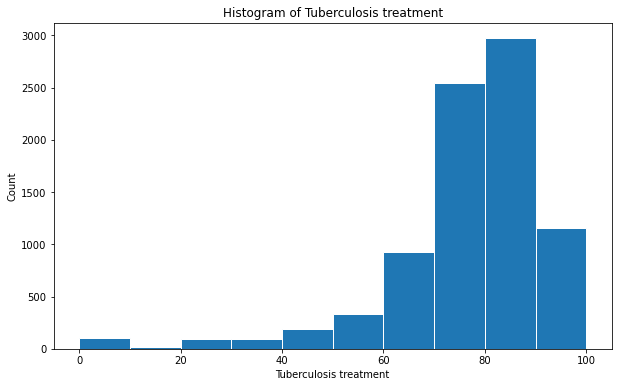

In [66]:
plot_histogram(life_exep_data['Tuberculosis treatment'], 'Count', 'Tuberculosis treatment', "Histogram of Tuberculosis treatment")

From the above histogram we can find that the most of the data of Tuberculosis treatment lies between 70 to 90.

<AxesSubplot:xlabel='Tuberculosis treatment'>

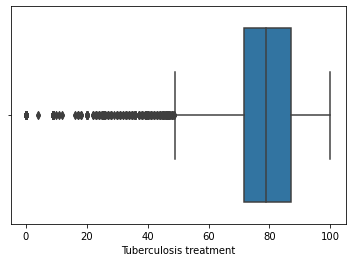

In [67]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Tuberculosis treatment'])

In [68]:
df = get_outlier(life_exep_data, 'Tuberculosis treatment')
df[['Country','Year','Gender','Tuberculosis treatment']]

,Country,Year,Gender,Tuberculosis treatment
0,Belize,2010,Male,0.000
1,Greece,2007,Male,0.000
2,Greece,2006,Male,0.000
3,Greece,2005,Male,0.000
4,Greece,2004,Male,0.000
...,...,...,...,...
491,Gabon,2016,Female,48.000
492,Gabon,2011,Female,48.000
493,Angola,2010,Female,48.000
494,Oman,2019,Male,48.000


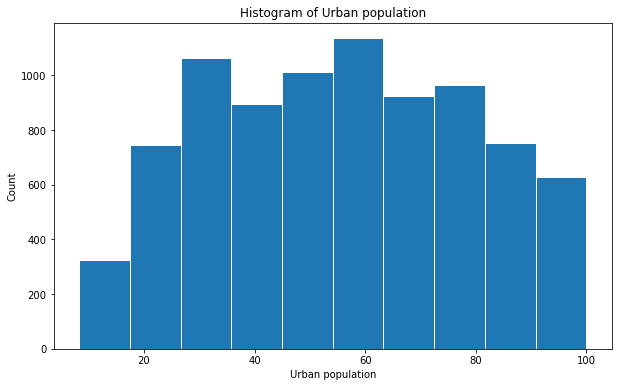

In [69]:
plot_histogram(life_exep_data['Urban population'], 'Count', 'Urban population', "Histogram of Urban population")

The above histogram shows that the data has comb distribution.

<AxesSubplot:xlabel='Urban population'>

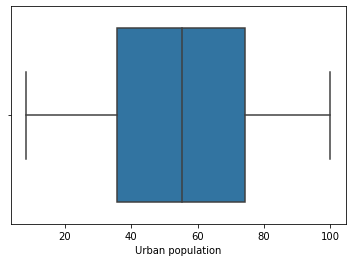

In [70]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Urban population'])

In [71]:
df = get_outlier(life_exep_data, 'Urban population')
df[['Country','Year','Gender','Urban population']]

,Country,Year,Gender,Urban population


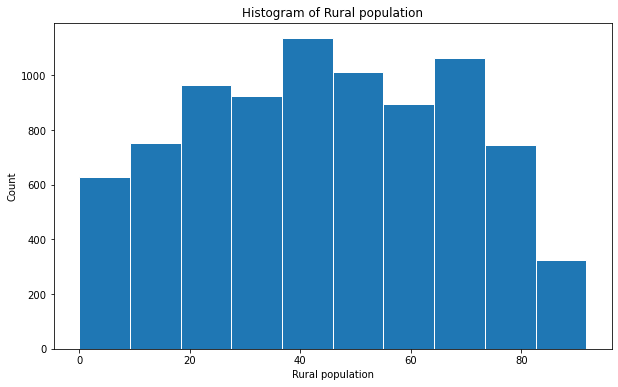

In [72]:
plot_histogram(life_exep_data['Rural population'], 'Count', 'Rural population', "Histogram of Rural population")

Distribution of rural population is similar to urban population and has comb distribution.

<AxesSubplot:xlabel='Rural population'>

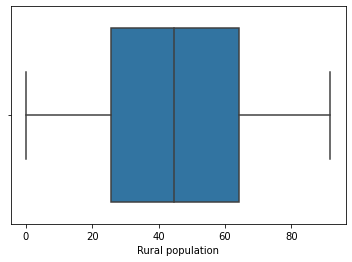

In [73]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Rural population'])

In [74]:
df = get_outlier(life_exep_data, 'Rural population')
df[['Country','Year','Gender','Rural population']]

,Country,Year,Gender,Rural population


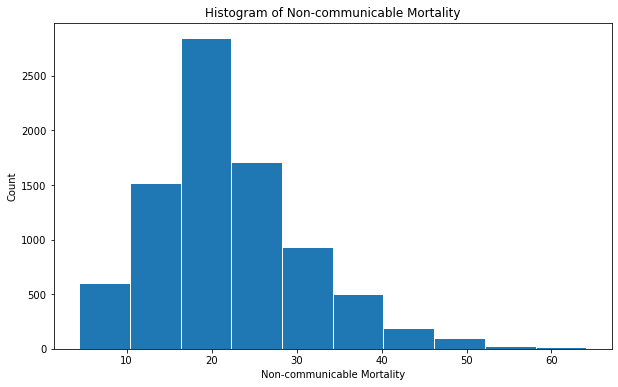

In [75]:
plot_histogram(life_exep_data['Non-communicable Mortality'], 'Count', 'Non-communicable Mortality', "Histogram of Non-communicable Mortality")

Non-communicable data is normally distributed and skewed towards left.

<AxesSubplot:xlabel='Non-communicable Mortality'>

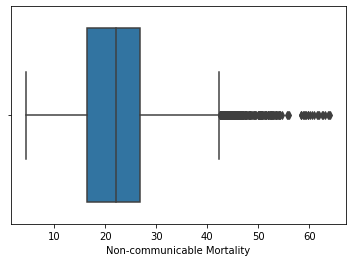

In [76]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Non-communicable Mortality'])

In [77]:
df = get_outlier(life_exep_data, 'Non-communicable Mortality')
df[['Country','Year','Gender','Non-communicable Mortality']]

,Country,Year,Gender,Non-communicable Mortality
0,Mozambique,2011,Male,42.300
1,Fiji,2017,Male,42.300
2,Kazakhstan,2009,Male,42.400
3,Kazakhstan,2010,Male,42.400
4,Lesotho,2003,Male,42.400
...,...,...,...,...
272,Kiribati,2004,Male,62.600
273,Kiribati,2003,Male,63.000
274,Kiribati,2002,Male,63.600
275,Kiribati,2001,Male,63.900


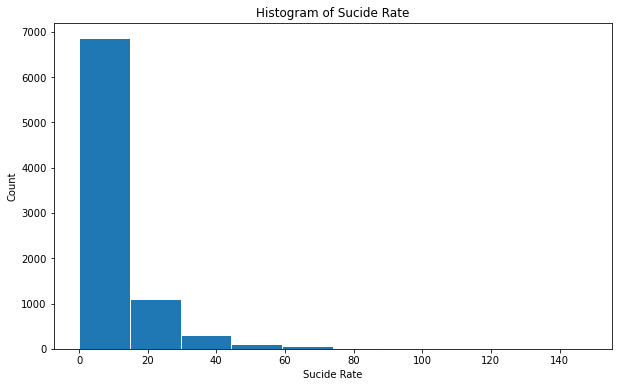

In [78]:
plot_histogram(life_exep_data['Sucide Rate'], 'Count', 'Sucide Rate', "Histogram of Sucide Rate")

Sucide Rate data is kewed towards left.

<AxesSubplot:xlabel='Sucide Rate'>

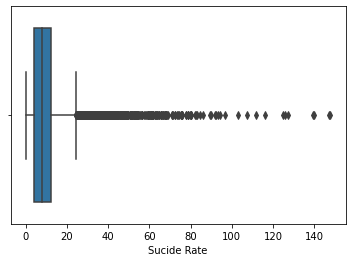

In [79]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Sucide Rate'])

Its seems that there are some outliers. Lets check them.

In [80]:
df = get_outlier(life_exep_data, 'Sucide Rate')
df[['Country','Year','Gender','Sucide Rate']]

,Country,Year,Gender,Sucide Rate
0,Switzerland,2003,Male,24.400
1,Sri Lanka,2013,Male,24.400
2,Luxembourg,2001,Male,24.400
3,Croatia,2017,Male,24.400
4,Mozambique,2012,Male,24.400
...,...,...,...,...
703,Lesotho,2017,Male,127.200
704,Lesotho,2016,Male,139.600
705,Lesotho,2013,Male,139.900
706,Lesotho,2015,Male,147.300


From the above analysis we have found that there is serious issue of outlier on GDP and GNI. So, lets solve this issue by removing these data.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

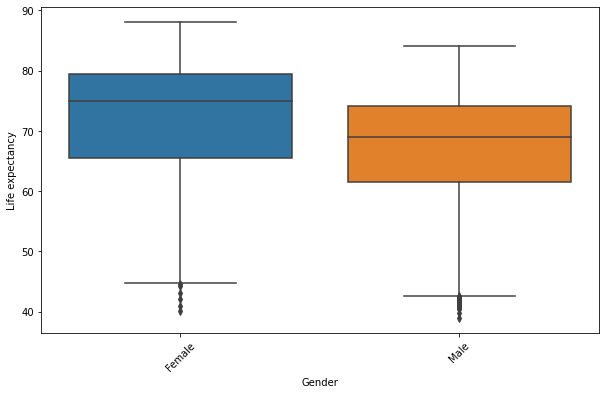

In [81]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Gender', y='Life expectancy', data=life_exep_data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the above boxplot, we can easily pridict that female has higher Life expectancy than male.

<AxesSubplot:xlabel='Life expectancy', ylabel='Unemployment'>

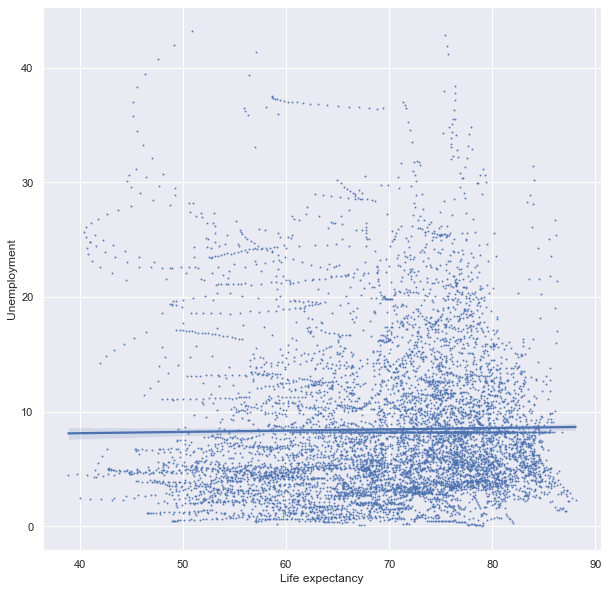

In [82]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(x="Life expectancy", y="Unemployment", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Infant Mortality'>

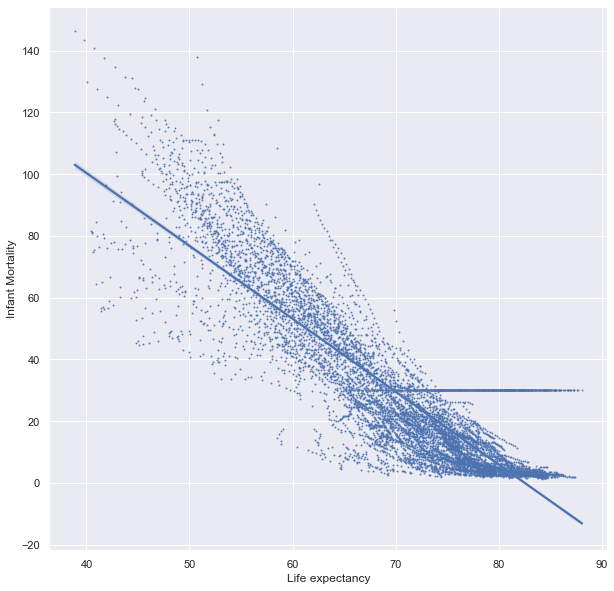

In [83]:
sns.regplot(x="Life expectancy", y="Infant Mortality", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='GDP'>

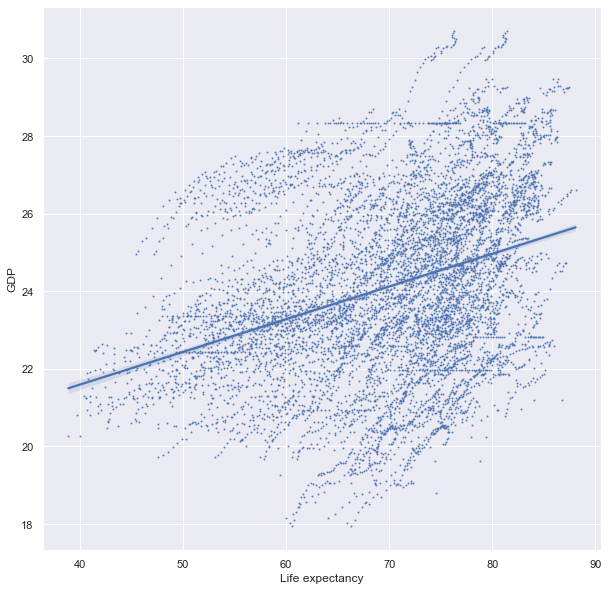

In [84]:
sns.regplot(x="Life expectancy", y="GDP", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='GNI'>

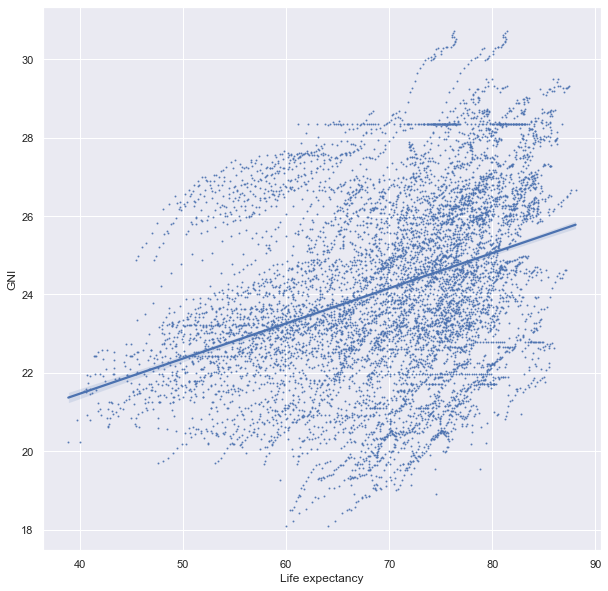

In [85]:
sns.regplot(x="Life expectancy", y="GNI", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Clean fuels and cooking technologies'>

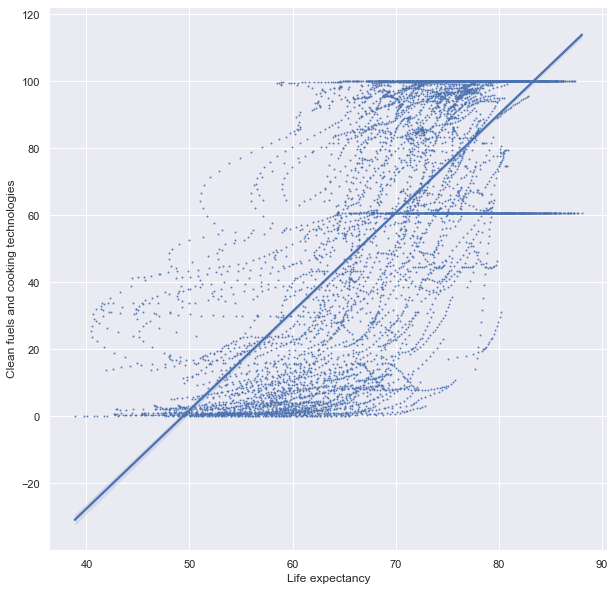

In [86]:
sns.regplot(x="Life expectancy", y="Clean fuels and cooking technologies", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Per Capita'>

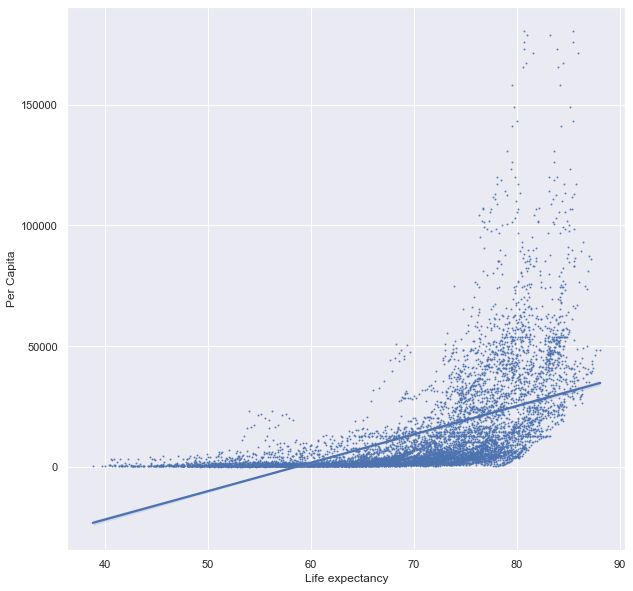

In [87]:
sns.regplot(x="Life expectancy", y="Per Capita", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Mortality caused by road traffic injury'>

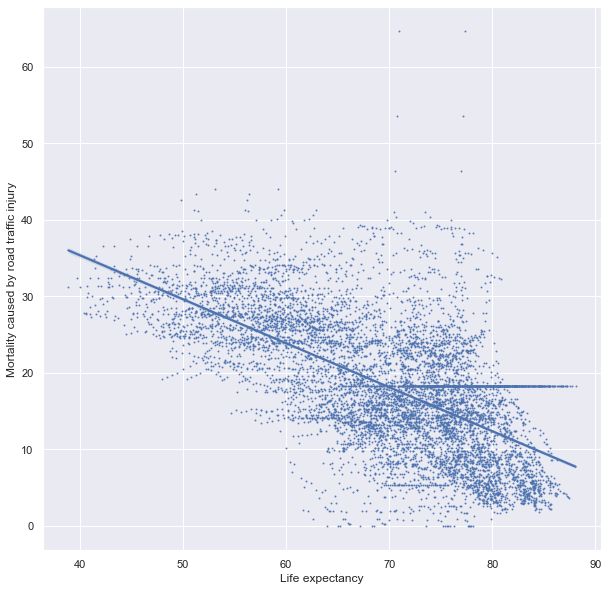

In [88]:
sns.regplot(x="Life expectancy", y="Mortality caused by road traffic injury", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Tuberculosis Incidence'>

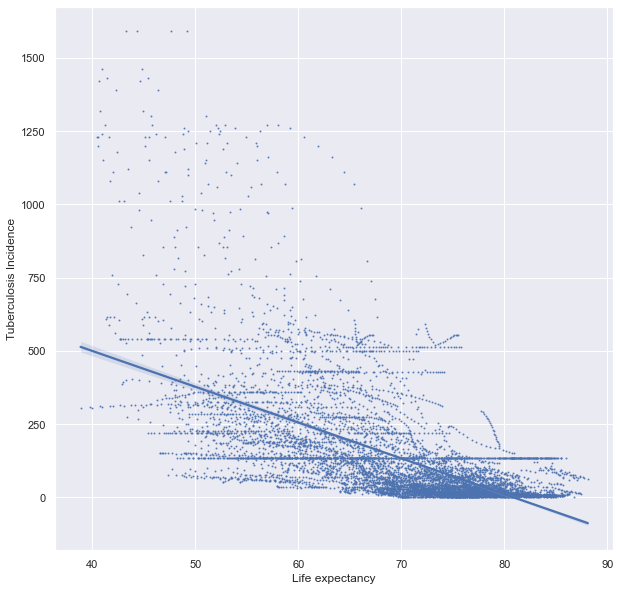

In [89]:
sns.regplot(x="Life expectancy", y="Tuberculosis Incidence", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='DPT Immunization'>

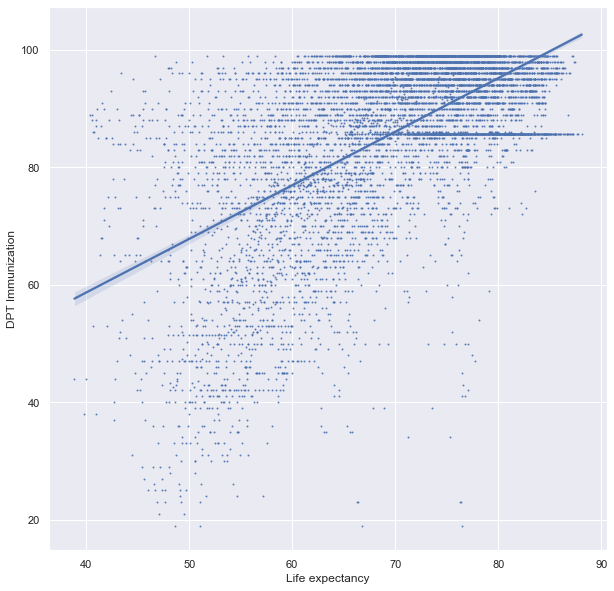

In [90]:
sns.regplot(x="Life expectancy", y="DPT Immunization", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='HepB3 Immunization'>

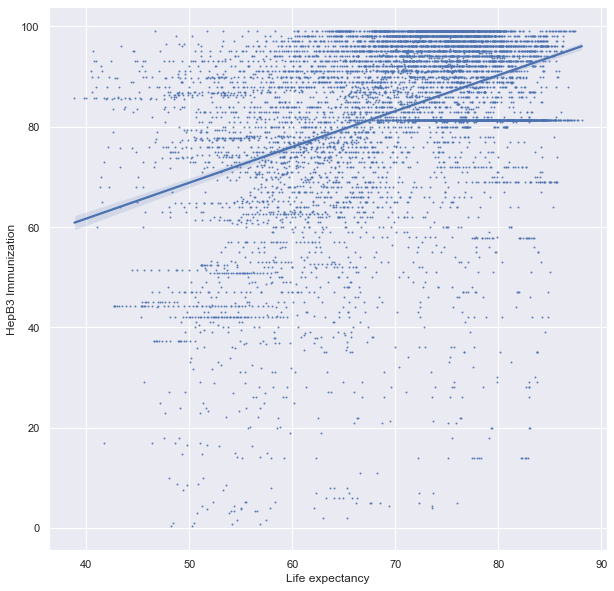

In [91]:
sns.regplot(x="Life expectancy", y="HepB3 Immunization", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Measles Immunization'>

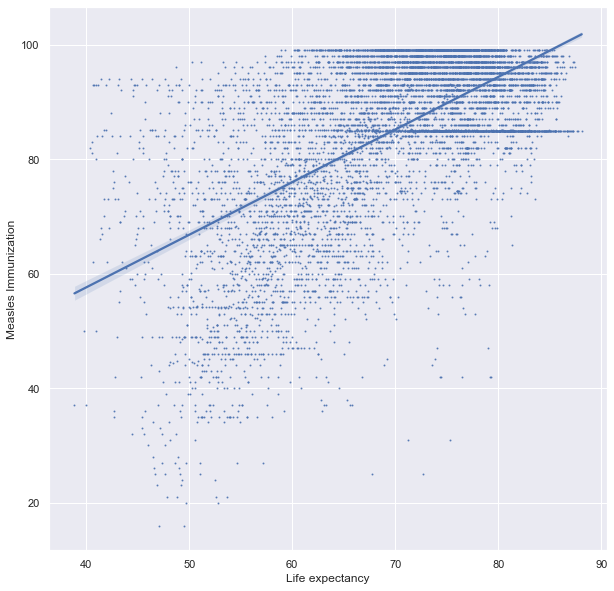

In [92]:
sns.regplot(x="Life expectancy", y="Measles Immunization", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Hospital beds'>

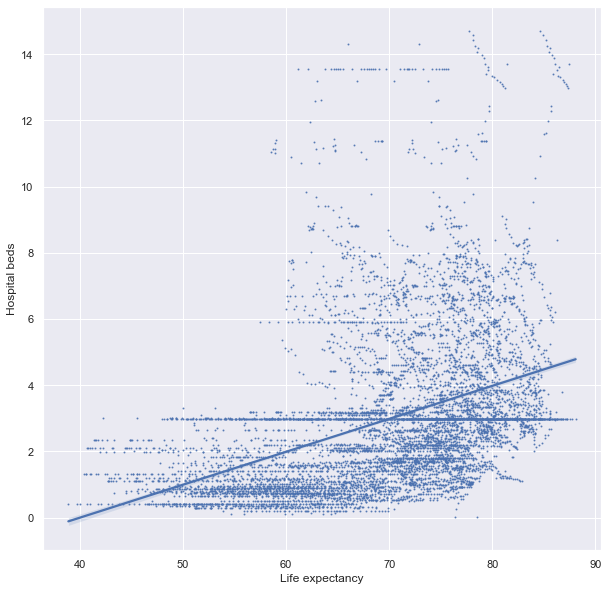

In [93]:
sns.regplot(x="Life expectancy", y="Hospital beds", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Basic sanitation services'>

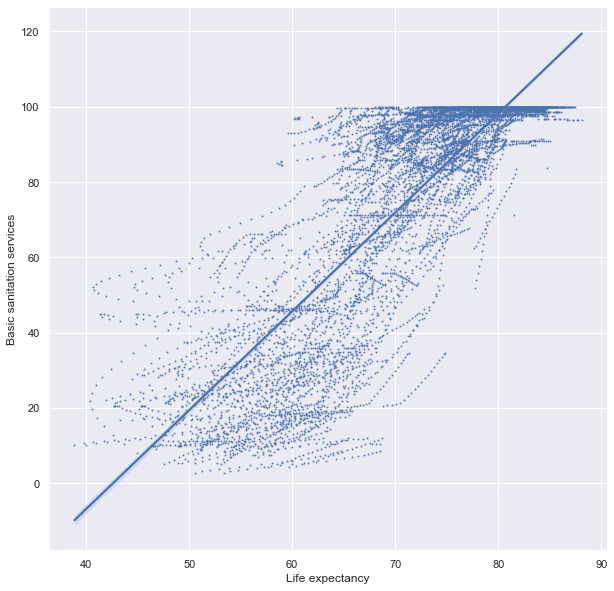

In [94]:
sns.regplot(x="Life expectancy", y="Basic sanitation services", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Tuberculosis treatment'>

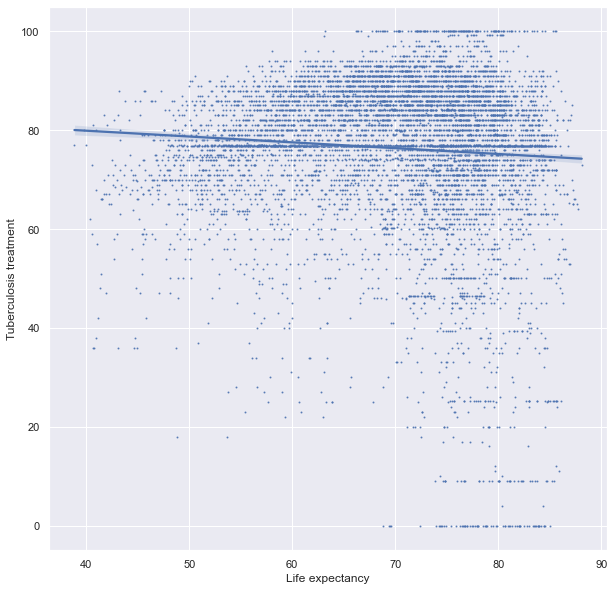

In [95]:
sns.regplot(x="Life expectancy", y="Tuberculosis treatment", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Urban population'>

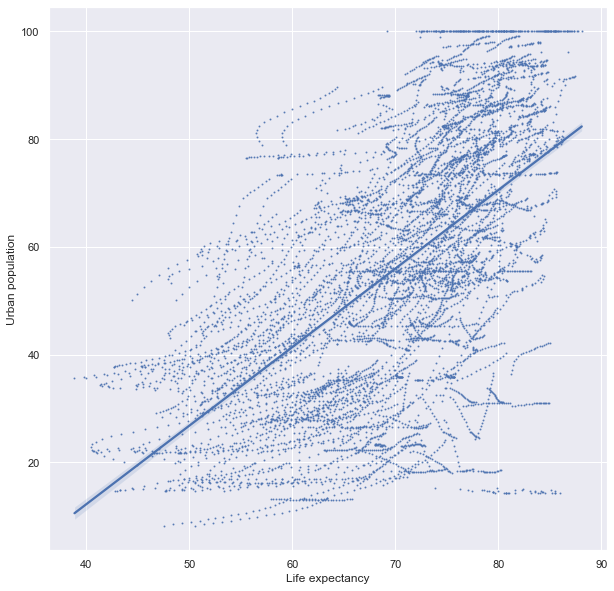

In [96]:
sns.regplot(x="Life expectancy", y="Urban population", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Rural population'>

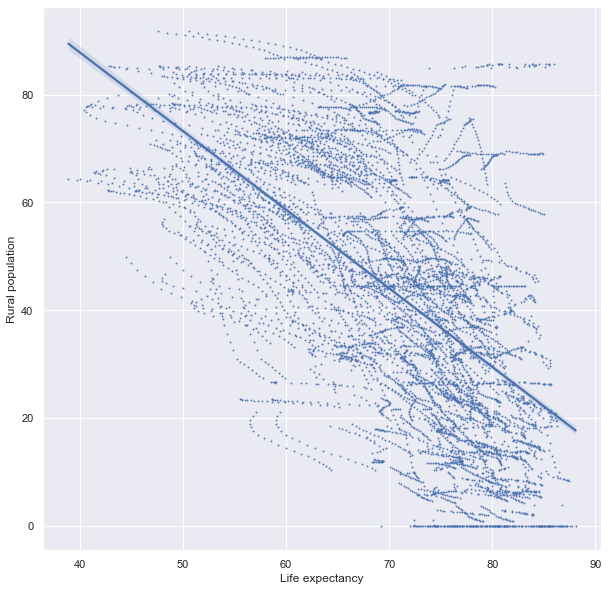

In [97]:
sns.regplot(x="Life expectancy", y="Rural population", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Non-communicable Mortality'>

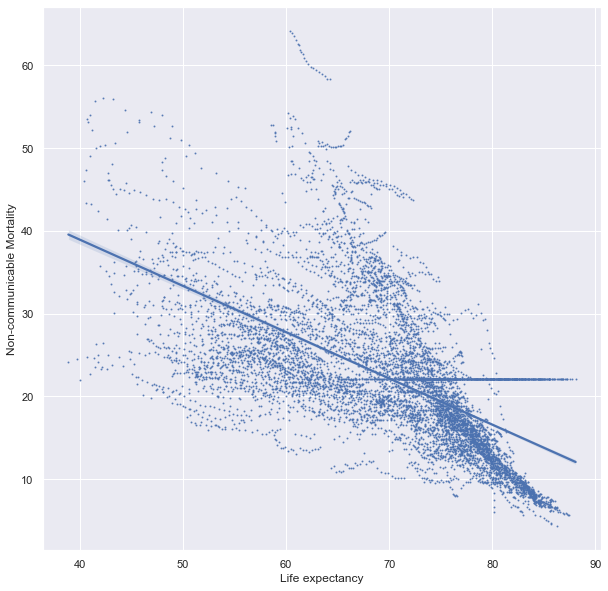

In [98]:
sns.regplot(x="Life expectancy", y="Non-communicable Mortality", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:xlabel='Life expectancy', ylabel='Sucide Rate'>

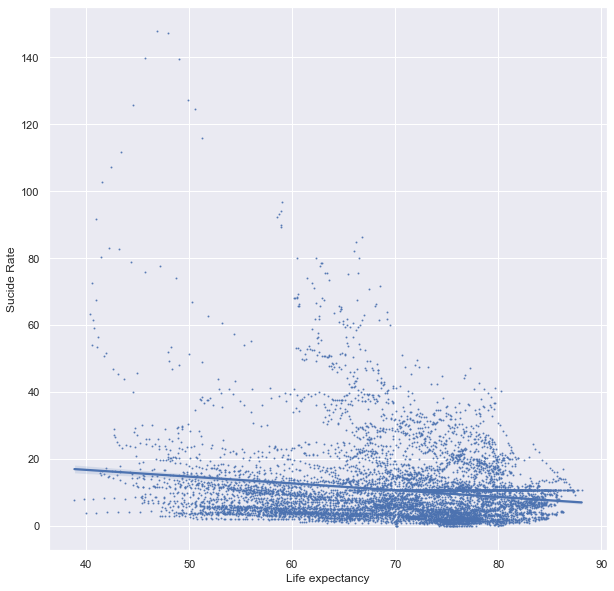

In [99]:
sns.regplot(x="Life expectancy", y="Sucide Rate", data=life_exep_data, scatter_kws={'s':1})

<AxesSubplot:>

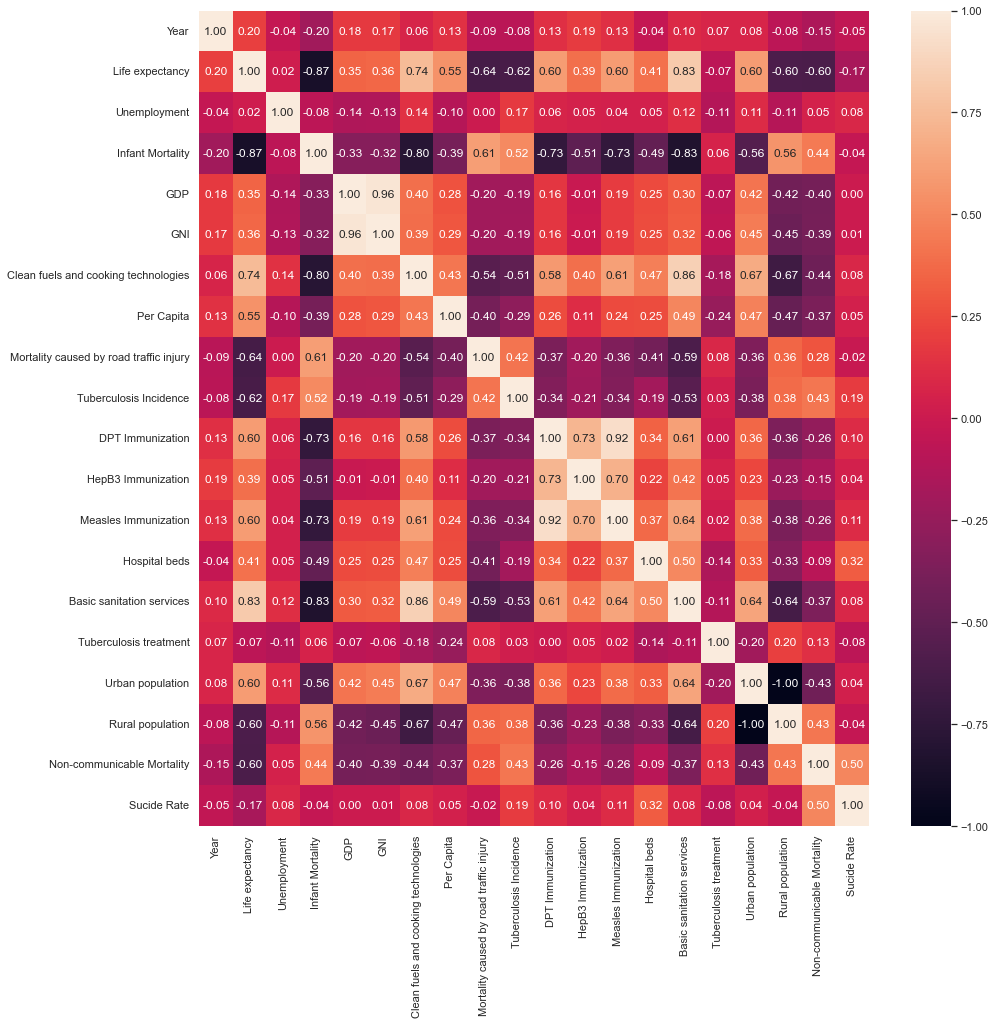

In [100]:
plt.figure(figsize=(15, 15))
sns.heatmap(life_exep_data.corr(), annot=True, fmt='.2f')

From the above corelation plot we can easily say that there are some multicollinearity issues between the variables. To solve this issue we are going to implement the PCA technique.

In [101]:
life_exep_data.head()

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,Afghanistan,2000,Female,57.120,13.846,85.000,23.340,23.627,6.400,434.740,...,24.000,65.077,27.000,0.300,21.871,85.000,22.078,77.922,39.400,4.800
1,Afghanistan,2001,Female,57.596,13.849,82.700,23.340,23.627,7.200,434.740,...,33.000,65.077,37.000,0.390,21.881,84.000,22.169,77.831,40.100,4.800
2,Afghanistan,2002,Female,58.080,14.355,80.400,22.123,23.627,8.200,179.427,...,36.000,65.077,35.000,0.390,23.274,87.000,22.261,77.739,40.500,4.600
3,Afghanistan,2003,Female,58.578,14.222,77.800,22.231,23.627,9.400,190.684,...,41.000,65.077,39.000,0.390,24.667,86.000,22.353,77.647,40.100,4.600
4,Afghanistan,2004,Female,59.093,14.047,75.300,22.377,23.627,10.400,211.382,...,50.000,65.077,48.000,0.390,26.068,89.000,22.500,77.500,40.200,4.600


## Standarize the data

We going to encode the Gender column because based on our research question we are going to predict the life expectancy base on the development indicators.

In [102]:
# Target variable
y = life_exep_data.iloc[:,3:4]

# Features
#X = life_exep_data.iloc[:, 2:]
X = life_exep_data.drop(['Country', 'Year', 'Life expectancy', 'Gender'], axis=1)

In [103]:
X

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,13.846,85.000,23.340,23.627,6.400,434.740,14.700,190.000,24.000,65.077,27.000,0.300,21.871,85.000,22.078,77.922,39.400,4.800
1,13.849,82.700,23.340,23.627,7.200,434.740,15.100,189.000,33.000,65.077,37.000,0.390,21.881,84.000,22.169,77.831,40.100,4.800
2,14.355,80.400,22.123,23.627,8.200,179.427,14.900,189.000,36.000,65.077,35.000,0.390,23.274,87.000,22.261,77.739,40.500,4.600
3,14.222,77.800,22.231,23.627,9.400,190.684,15.000,189.000,41.000,65.077,39.000,0.390,24.667,86.000,22.353,77.647,40.100,4.600
4,14.047,75.300,22.377,23.627,10.400,211.382,15.200,189.000,50.000,65.077,48.000,0.390,26.068,89.000,22.500,77.500,40.200,4.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,4.352,46.600,23.717,23.699,29.800,1445.070,38.700,242.000,87.000,87.000,86.000,2.350,38.121,81.000,32.385,67.615,32.500,23.800
9924,4.358,45.100,23.746,23.727,29.700,1464.589,39.900,233.000,90.000,90.000,95.000,2.350,37.529,81.000,32.296,67.704,31.800,22.500
9925,4.353,44.200,23.590,23.573,29.600,1235.189,40.100,221.000,89.000,89.000,90.000,2.350,36.942,83.000,32.237,67.763,30.900,21.000
9926,4.360,42.900,23.620,23.603,29.800,1254.642,40.600,210.000,89.000,89.000,88.000,2.350,36.357,84.000,32.209,67.791,30.300,19.900


In [104]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [105]:
X_train

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
1570,9.374,3.000,28.582,28.605,100.000,38685.258,5.500,9.000,96.000,90.000,90.000,5.980,98.650,24.000,80.180,19.820,7.400,8.000
9617,10.360,11.700,25.524,25.466,94.200,2639.392,17.000,115.000,71.000,66.000,75.000,9.400,96.102,60.000,68.502,31.498,42.800,47.600
8838,2.944,6.800,27.391,27.401,100.000,23337.018,33.200,10.000,96.000,97.000,98.000,2.296,100.000,90.000,83.844,16.156,22.900,9.100
4869,16.674,20.200,22.358,22.423,60.593,1543.701,5.300,0.980,85.685,81.308,84.855,2.986,91.466,100.000,73.061,26.939,22.100,10.619
7155,8.256,30.235,21.390,21.427,60.593,24864.436,18.229,136.043,85.685,81.308,84.855,2.986,71.106,76.726,51.851,48.149,22.100,10.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5133,7.778,14.700,26.531,26.500,98.800,8225.138,13.300,22.000,94.000,94.000,96.000,4.610,91.975,43.000,90.691,9.309,22.900,13.900
9331,6.046,3.500,26.535,26.552,100.000,37321.798,6.000,5.100,99.000,57.889,95.000,3.050,98.991,83.000,84.196,15.804,14.600,19.700
5619,11.398,18.300,21.191,21.154,74.900,3043.031,25.000,64.000,93.000,94.000,92.000,2.100,70.341,89.000,64.300,35.700,17.100,24.000
3864,13.931,11.400,26.977,26.994,100.000,20078.260,25.700,18.000,98.000,98.000,97.000,2.210,99.045,61.000,81.649,18.351,23.800,1.500


In [106]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [107]:
pd.DataFrame(transformed_X_train).to_csv('data/impv/without_pca/X_train.csv', index=False, header=X_test.columns)
pd.DataFrame(transformed_X_test).to_csv('data/impv/without_pca/X_test.csv', index=False, header=X_test.columns)
y_train.to_csv('data/impv/without_pca/y_train.csv', index=False)
y_test.to_csv('data/impv/without_pca/y_test.csv', index=False)

In [108]:
pd.DataFrame(transformed_X_train, columns=X_train.columns).head(2)

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,0.138,-1.046,1.932,1.909,1.065,1.253,-1.476,-0.670,0.695,0.411,0.347,1.268,0.898,-3.322,1.056,-1.056,-1.683,-0.229
1,0.289,-0.710,0.617,0.574,0.912,-0.517,-0.136,-0.116,-1.014,-0.976,-0.679,2.711,0.814,-1.040,0.557,-0.557,2.302,3.182


Lets create PCA object from sklearn. And fit the standarised data to PCA. Here, we have use 80% and a threshold to reduct the dimension and noise.

In [109]:
# pca = PCA()
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.39246739, 0.12523992, 0.0909756 , 0.07474945, 0.06195232,
       0.04960804, 0.04602064, 0.03452952, 0.0292097 ])

From the 80% threshold our 18 attributes has been reduced to 7 attributes. This will help use to improve the performance of algorithm significantly.

Lets convert the variance ratio to percentage so that it will be easy to under stand the variance of each component.

In [110]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([39.25, 51.77, 60.87, 68.34, 74.54, 79.5 , 84.1 , 87.55, 90.47])

Now lets visualise the weight of attribute on each component.

In [111]:
loadings = pca_data.components_

labels = ['PC' + str(x) for x in range(1, pca_data.n_components_+1)]

loadings_df = pd.DataFrame.from_dict(dict(zip(labels, loadings)))
loadings_df['variable'] = X_train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
Unemployment,-0.018,0.157,0.244,0.367,0.566,-0.359,0.358,0.151,-0.198
Infant Mortality,0.333,-0.142,0.059,0.018,0.051,0.113,-0.115,0.002,0.043
GDP,-0.191,-0.419,0.074,-0.432,0.135,0.004,0.198,-0.009,-0.151
GNI,-0.194,-0.422,0.081,-0.425,0.147,-0.011,0.156,0.015,-0.136
Clean fuels and cooking technologies,-0.333,0.021,0.054,0.085,0.015,-0.116,0.047,-0.121,-0.150
Per Capita,-0.213,-0.166,0.063,0.195,-0.280,0.306,-0.171,0.655,-0.111
Mortality caused by road traffic injury,0.235,-0.034,0.008,-0.125,0.419,0.295,-0.241,-0.292,0.087
Tuberculosis Incidence,0.217,0.034,0.304,-0.121,0.310,0.173,0.131,0.537,0.326
DPT Immunization,-0.271,0.344,-0.101,-0.181,0.118,0.217,0.043,0.046,-0.073


Lets visualise the weight on heatmap.

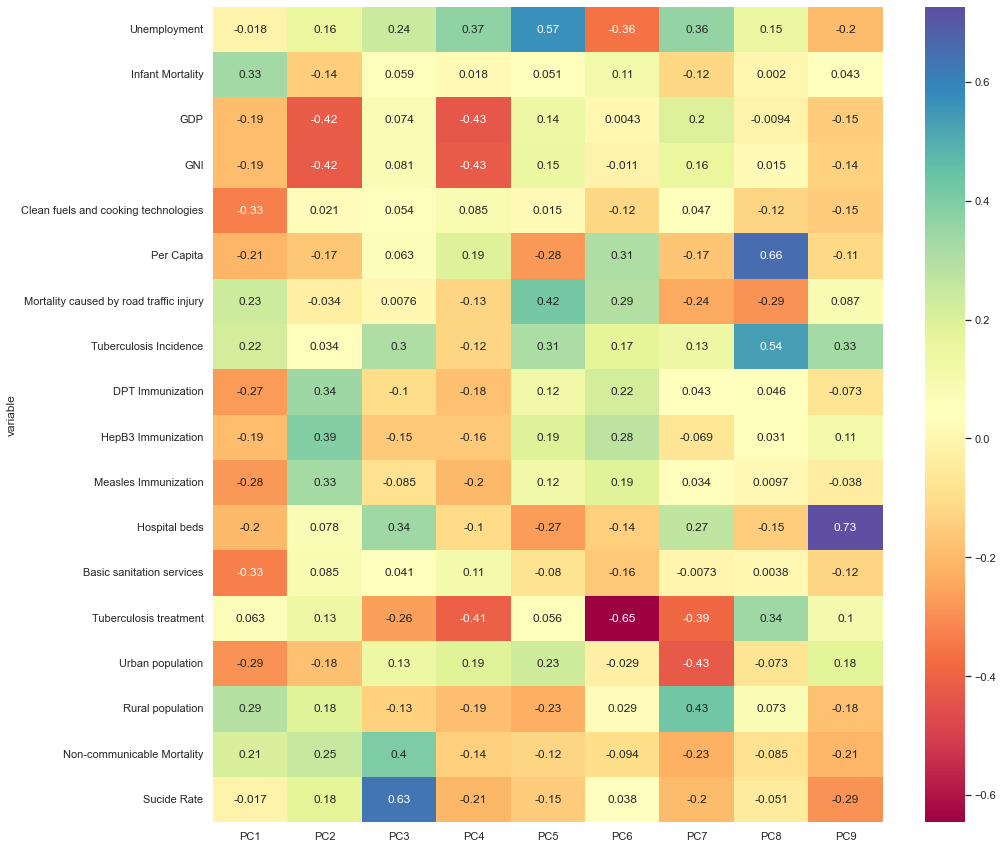

In [112]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')

Transform the data to proper format so that we can visualise the component on biplot.

In [113]:
weight_df = loadings_df.reset_index().iloc[:, :3]
weight_df = pd.melt(weight_df, id_vars="variable", var_name="Component", value_name="Weight")

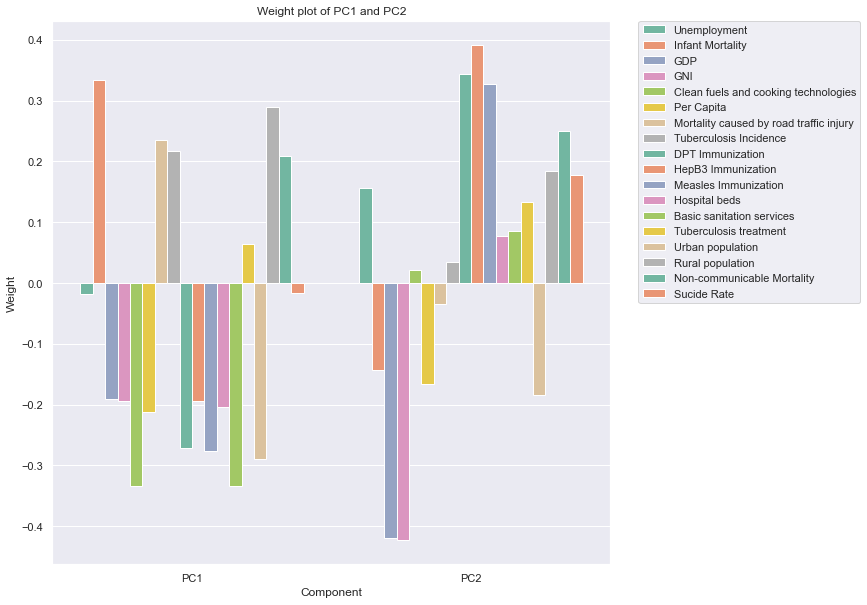

In [114]:
sns.barplot(x='Component', y='Weight', hue='variable', data=weight_df, palette=sns.color_palette("Set2")).set_title("Weight plot of PC1 and PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Lets visualise the variance and component in scree plot.

Text(0.5, 1.0, 'PCA: variance plot')

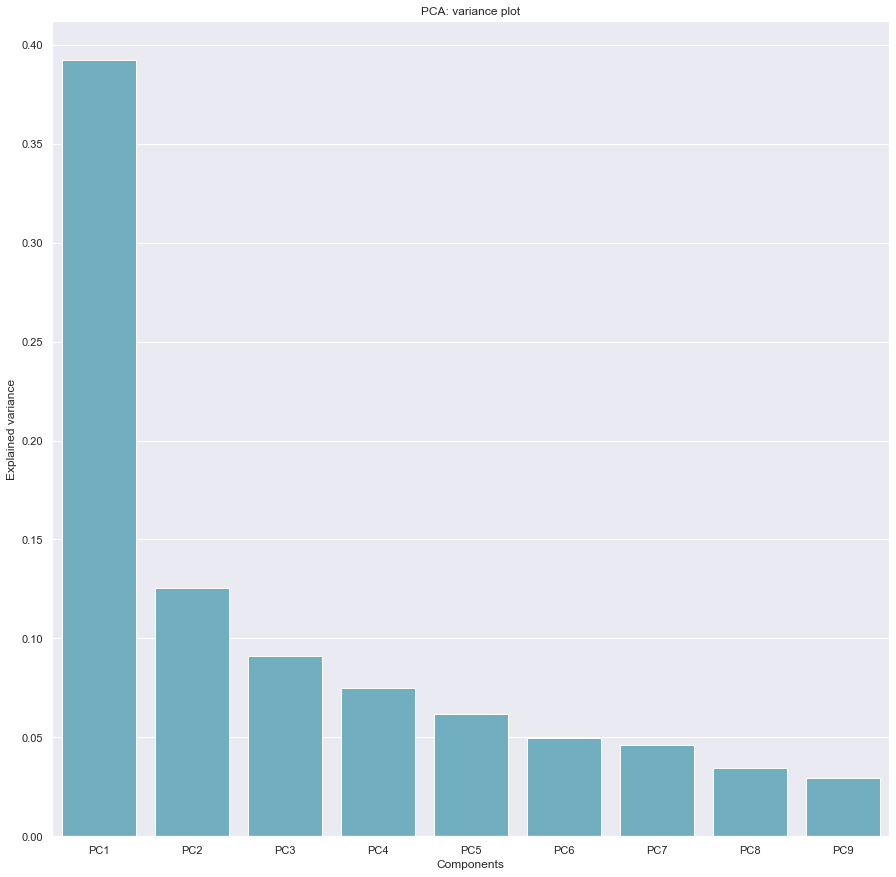

In [115]:
pca_df = pd.DataFrame({'Explained variance':pca_data.explained_variance_ratio_,'Components':labels})
plt.figure(figsize=(15, 15))
sns.barplot(x='Components',y="Explained variance",  data=pca_df, color="c").set_title("PCA: variance plot")

Text(0, 0.5, 'Explained variance')

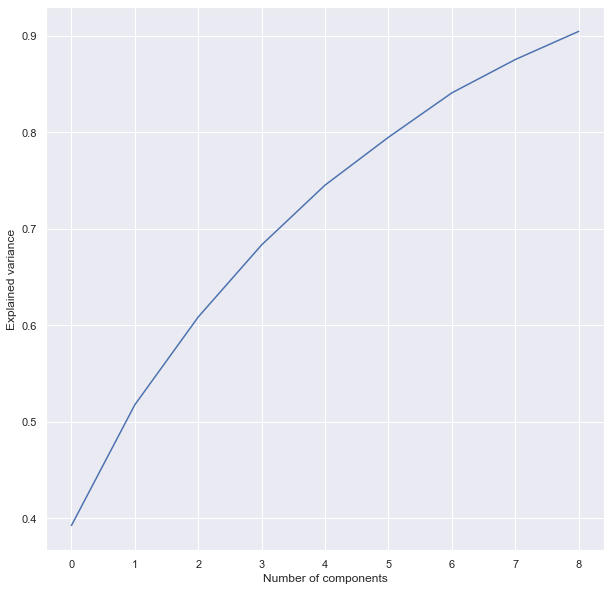

In [116]:
plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [117]:
# column_names = X_test.columns

In [118]:
# pd.DataFrame(column_names).to_csv('data/impv/columns.csv', index=False)

In [119]:
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)

In [120]:
X_train.shape

(5913, 9)

With the help of Principal Component Analysisc (PCA) the feature has been reduced from 18 to 7. This will help to reduct the noise that is present in the dataset.

In [121]:
X_test.shape

(2535, 9)

In [122]:
y_train.shape

(5913, 1)

In [123]:
y_test.shape

(2535, 1)

In [124]:
pd.DataFrame(X_train).to_csv('data/impv/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('data/impv/X_test.csv', index=False)
y_train.to_csv('data/impv/y_train.csv', index=False)
y_test.to_csv('data/impv/y_test.csv', index=False)